In [130]:
import tensorflow as tf
import os, shutil
from sklearn.metrics import classification_report, confusion_matrix


In [131]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [132]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [134]:
train_dir = "D:/MS/train"
validation_dir = "D:/MS/validation"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 318 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


In [135]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 3)


In [140]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=15,
      epochs=6,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/6
15/15 [==============================] - 3s 231ms/step - loss: 0.3903 - acc: 0.8176 - val_loss: 0.5567 - val_acc: 0.7400
Epoch 2/6
15/15 [==============================] - 5s 323ms/step - loss: 0.4611 - acc: 0.8067 - val_loss: 0.3576 - val_acc: 0.8800
Epoch 3/6
15/15 [==============================] - 5s 318ms/step - loss: 0.3739 - acc: 0.8514 - val_loss: 0.3653 - val_acc: 0.9100
Epoch 4/6
15/15 [==============================] - 5s 313ms/step - loss: 0.3294 - acc: 0.8986 - val_loss: 0.4775 - val_acc: 0.7200
Epoch 5/6
15/15 [==============================] - 5s 301ms/step - loss: 0.3269 - acc: 0.8716 - val_loss: 0.3350 - val_acc: 0.8600
Epoch 6/6
15/15 [==============================] - 4s 296ms/step - loss: 0.2757 - acc: 0.8933 - val_loss: 0.3482 - val_acc: 0.8800


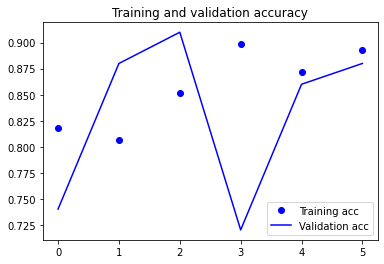

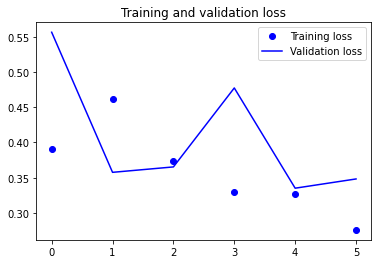

In [141]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [149]:
#Confusion Matrix and Classification Report
num_of_test_samples = 200
batch_size = 15
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['early_blight', 'healthy', 'late_blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


c:\users\mohsin.hussain\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[12 21 13]
 [16 17 13]
 [10 15 21]]
Classification Report
              precision    recall  f1-score   support

early_blight       0.32      0.26      0.29        46
     healthy       0.32      0.37      0.34        46
 late_blight       0.45      0.46      0.45        46

    accuracy                           0.36       138
   macro avg       0.36      0.36      0.36       138
weighted avg       0.36      0.36      0.36       138



In [150]:
model.save('potatoDisease.h5')

In [151]:
from tensorflow.keras.preprocessing import image
import numpy as np


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [152]:
img_path = 'D:\MS\Machine Learning\plant_disease_detection\PlantVillage\Potato___Early_blight\95cd8c85-b3b1-4d90-828d-1c93ea98977a___RS_Early.B 9109.JPG'    # dog


In [153]:
new_image = load_image(img_path)


In [154]:
pred = model.predict(new_image)


In [155]:
import operator
index, value = max(enumerate(pred[0]), key=operator.itemgetter(1))

In [156]:
if index == 0:
    print('Potato Early Blight')
elif index == 1:
    print('Potato Healthy')
else:
    print('Potato Late Blight')

Potato Early Blight
